# Computational Social Science Project #3 

**Enter your Name:** Taylor Brown

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

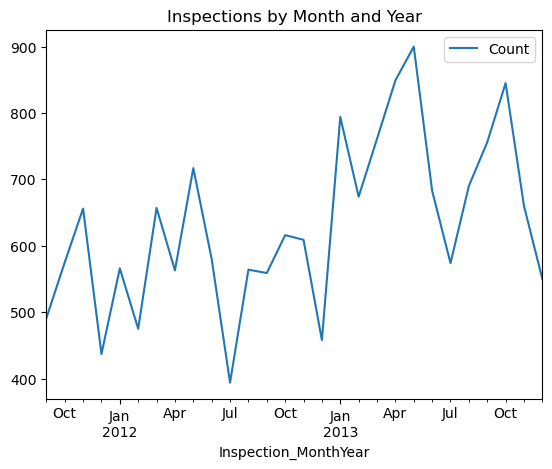

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

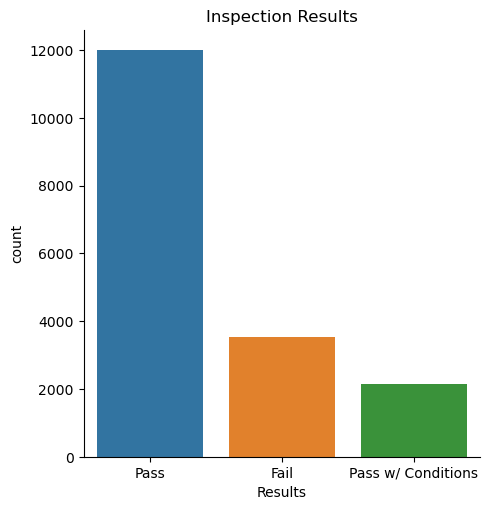

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

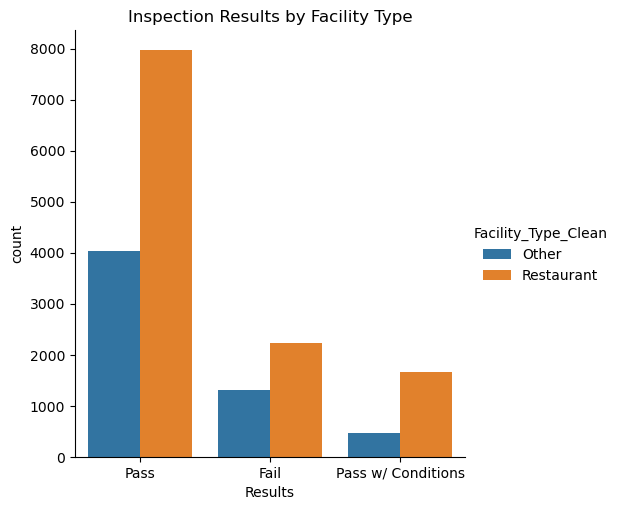

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results',
                                                     'Facility_Type',
                                                     'LICENSE_DESCRIPTION',
                                                     'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [13]:
X.shape

(15311, 41)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [14]:
# importing relevant libraries here

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import accuracy_score

import arviz as az                 
import pymc as pm                  
import pymc_bart as pmb

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

### Model 1: Random Forest

A Random Forest model might be appropriate for this problem because of its relatively easy interpretation through plots like
feature importance and decision trees. Random Forests are an ensemble method meaning that it works by constructing multiple
decision trees through bootstrapping and then outputting the mode (in the case of classification) or most frequent prediction.
Random Forests are relatively robust against overfitting, are able to handle large feature sets, and often offers relatively
high prediction accuracy. Random Forests, on the other hand, still have the potential to overfit data, are still very difficult
to communicate to a lay audience, and are--to my knowledge--nonparametric, meaning that statistical generalizbility to new data
are based on testing the model on the new data, not inference.

In [16]:
# initialize a random forest classifier

# set parameters

rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              
                       criterion='gini',              
                       max_depth=None,                
                       min_samples_split=2,           
                       min_samples_leaf=1,            
                       min_weight_fraction_leaf=0.0,  
                       max_features=None,             
                       max_leaf_nodes=None,           
                       min_impurity_decrease=1e-07,   
                       random_state = 123)     

rf_classifier.fit(X, y.ravel())

# set parameters
param_grid = {'n_estimators': [30, 100],
              'criterion': ['gini', 'entropy', 'log_loss']}

# execute the grid search and fit to training data
rf_grid = GridSearchCV(rf_classifier,
                       param_grid,
                       cv=10)

rf_grid.fit(X, y.ravel())

# choose best performing model
best_index = np.argmax(rf_grid.cv_results_["mean_test_score"])
best_rf_pred = rf_grid.best_estimator_.predict(X)

# print results
print(rf_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_rf_pred, y))

## best model: 100 estimators, entropy, validation accuracy = .99993

{'criterion': 'entropy', 'n_estimators': 100}
Validation Accuracy 0.9999346874795898


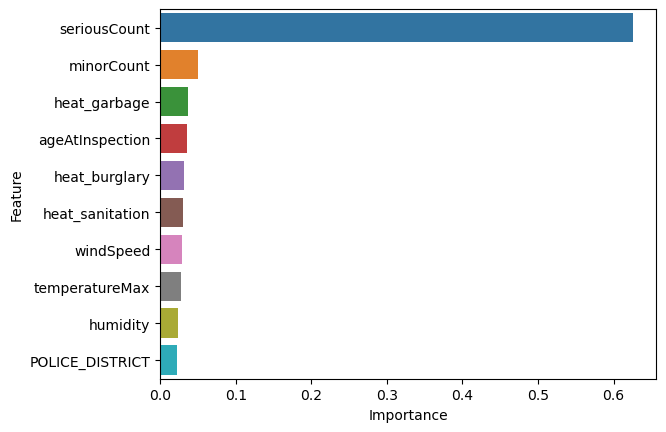

In [17]:
# fit the random forest on data to get feature importance

rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              
                       criterion='entropy',              
                       max_depth=None,                
                       min_samples_split=2,           
                       min_samples_leaf=1,            
                       min_weight_fraction_leaf=0.0,  
                       max_features=None,             
                       max_leaf_nodes=None,           
                       min_impurity_decrease=1e-07,   
                       random_state = 123)   

rf_model = rf_classifier.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

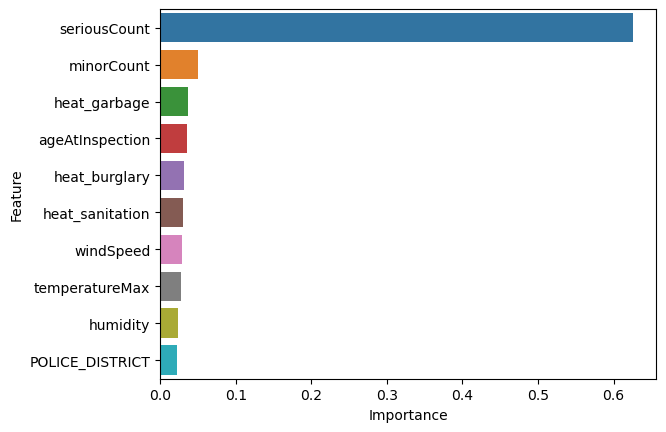

In [18]:
# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

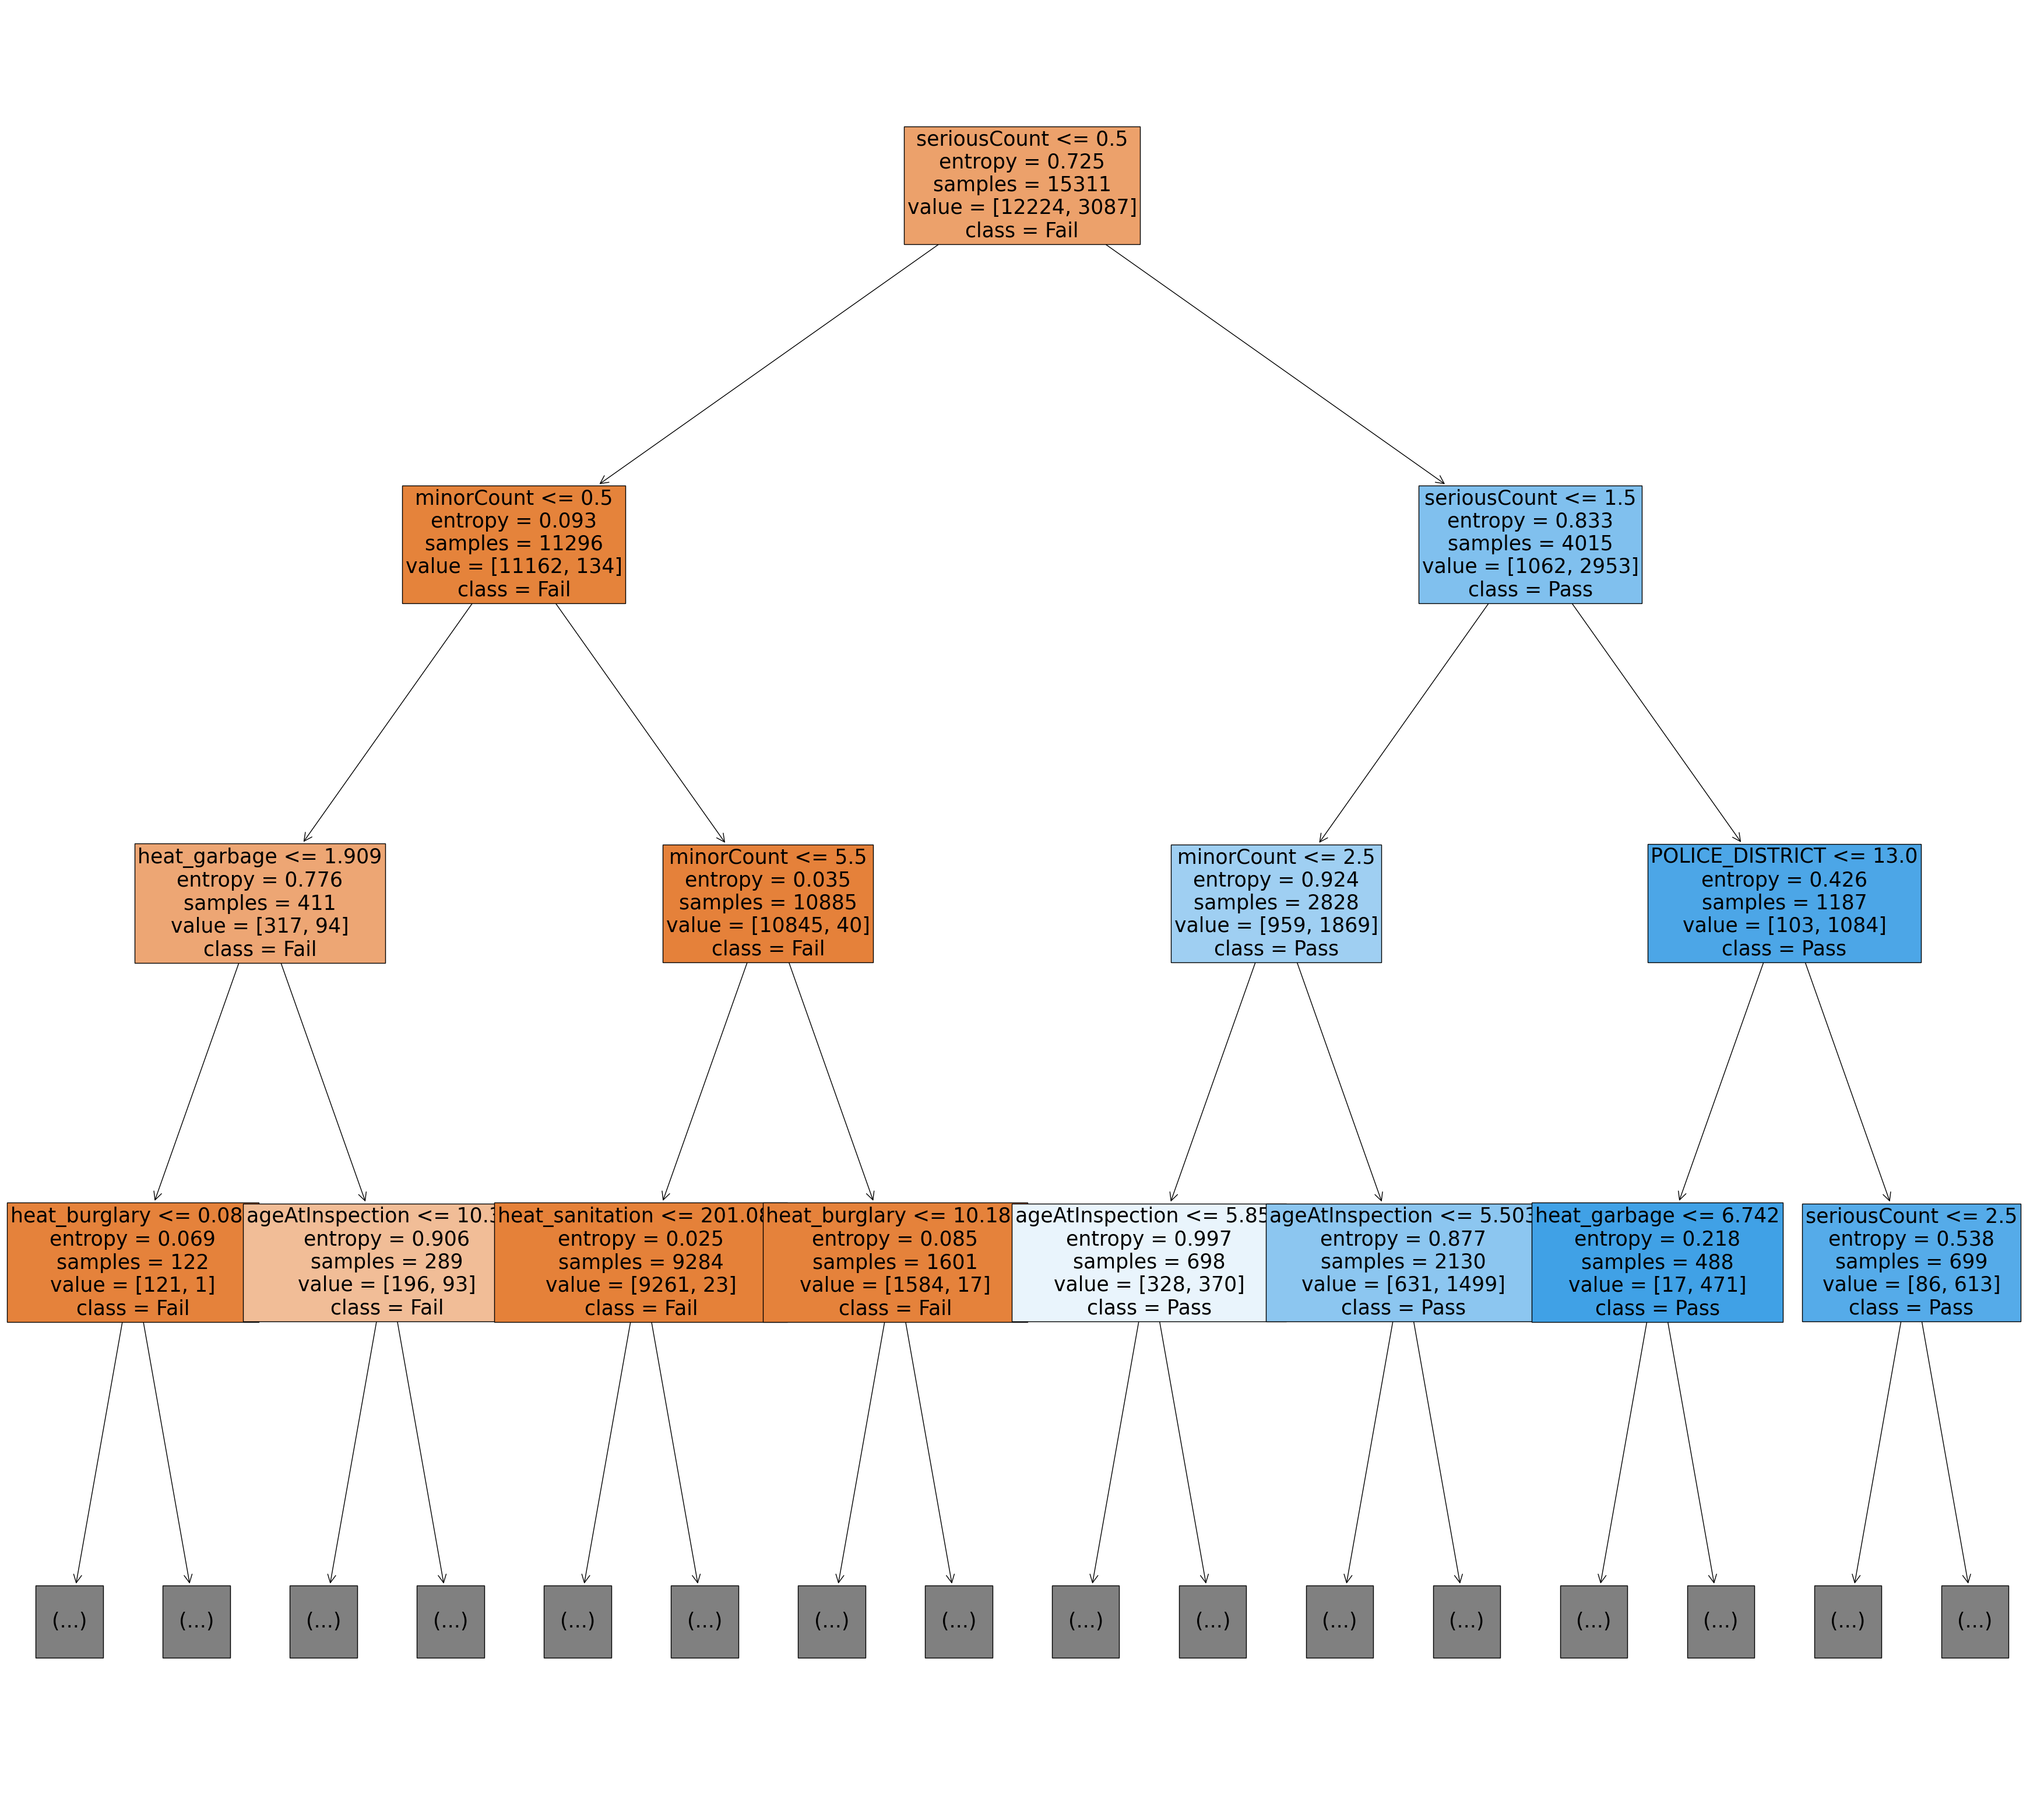

In [19]:
# refit a basic decision tree using reduced number of features 
# ----------
rf_reduced_classifier = tree.DecisionTreeClassifier(
                                 # specify parameters
                                 criterion = 'entropy',           
                                 splitter = 'best',               
                                 max_depth = 4,                   
                                 min_samples_split = 2,           
                                 min_samples_leaf = 1,            
                                 min_weight_fraction_leaf = 0.0,  
                                 max_features = None,             
                                 max_leaf_nodes = None,           
                                 min_impurity_decrease = 1e-07,   
                                 random_state = 123)             

# pull out the most features
important_features = feat_importances.nlargest(10, 'Importance')['Feature']

# create new dataset with only most important features
X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit the model on the new reduced model
rf_reduced_classifier.fit(X_reduced,
                          y)

# set column names as list
reduced_column_names = X_reduced.columns.tolist()

# plot 
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(decision_tree = rf_reduced_classifier,                          
                   feature_names = reduced_column_names,  
                   class_names = ["Fail", "Pass"],
                   filled = True,                         
                   fontsize = 25,                       
                   max_depth = 3)                          

In [20]:
# calculate accuracy using cross validation

rf_scores = cross_validate(rf_reduced_classifier,
                           X,
                           y.ravel(),
                           cv = 10,
                           scoring = scoring)

# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = rf_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.920
recall: 0.897
precision: 0.759
f1: 0.819


###  Model 2: Adaptive Boosting

Adaptive Boosting (AdaBoost) might be appropriate for this problem because of its attention to difficult cases, sequential
nature, and relatively high prediction accuracy. AdaBoost is another ensemble method that builds on Random Forest models by
improving the performance of "weak learners" by iteratively training a sequence of weak learners while assigning a greater
weight to missclassified predictions throughout the process. While this attention to difficult cases can be considered a pro
for AdaBoost, these difficult cases might also lead the model to be too sensitive to noisy data and outliers.

In [21]:
# initialize an adaptive boosting classifer 

ada_classifier = AdaBoostClassifier(n_estimators = 100,
                                   random_state = 123)

# calculate accuracy using cross validation

ada_scores = cross_validate(ada_classifier,
                            X,
                            y.ravel(),
                            cv = 10,
                            return_estimator = True,
                            scoring = scoring)         

# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = ada_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.916
recall: 0.820
precision: 0.778
f1: 0.797


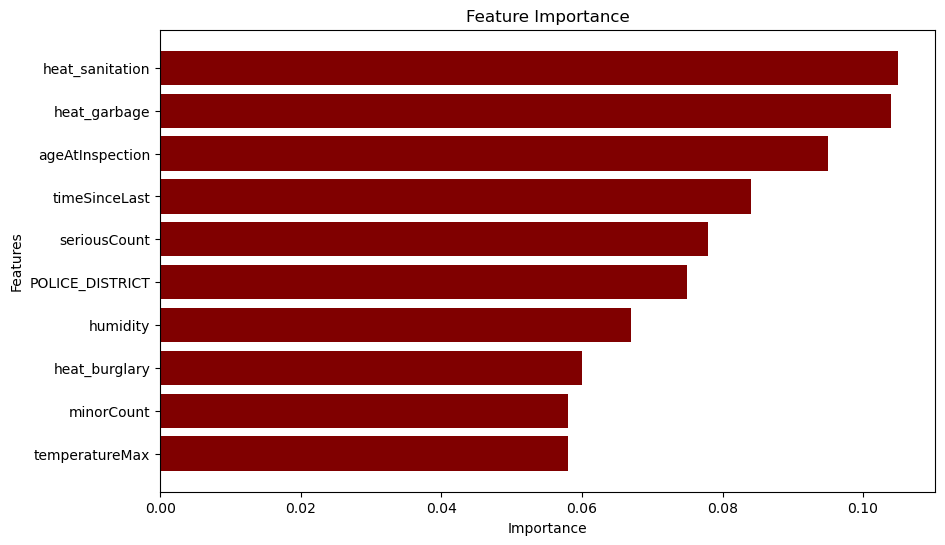

In [22]:
# feature importance

# initialize an array to hold the feature importances
importances_ada = np.zeros(X.shape[1])

# average the feature importances over the folds
for estimator in ada_scores['estimator']:
    importances_ada += estimator.feature_importances_
    
# divide by the number of folds
importances_ada /= 10  

# create a DataFrame for visualization
feature_importance_ada = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances_ada})

# sort the features by importance
feature_importance_ada = feature_importance_ada.sort_values('importance', ascending=False)

# take the top 10 features
feature_importance_ada = feature_importance_ada.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance_ada['feature'], 
         feature_importance_ada['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

### Model 3: Extreme Gradient Boosting

Extreme Gradient Boosting (XGBoost) might be an appropriate model for this problem because of its powerful prediction accuracy.
In a similar logic to Random Forest and Adaptive Boosting models, Extreme Gradient Boosting models build an iterative ensemble
of decision trees while focusing on weak learners and optimizing loss function using gradient descent optimization. While
Extreme Gradient Boosting is an extremely powerful algorithm, it is, of course, sensitive to overfitting annd imbalanced and
noisy data. Importantly when compared to Random Forests, however, Extreme Gradient Boosting is considered a "black box" and is
extremely difficult to communicate with a lay audience.

In [ ]:
# initialize an XGBoost classifier

xgb_classifier = xgb.XGBClassifier(random_state = 123)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 10-fold and return the trained estimators
xgb_scores = cross_validate(xgb_classifier,        
                            X,                     
                            y.ravel(),             
                            cv = 10,                  
                            return_estimator = True, 
                            scoring = scoring)       
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = xgb_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

In [ ]:
# feature importance

# initialize an array to hold the feature importances
importances_xgb = np.zeros(X.shape[1])

# average the feature importances over the folds
for estimator in xgb_scores['estimator']:
    importances_xgb += estimator.feature_importances_
    
# divide by the number of folds
importances_xgb /= 10  

# create a DataFrame for visualization
feature_importance_xgb = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances_xgb})

# sort the features by importance
feature_importance_xgb = feature_importance_xgb.sort_values('importance', ascending=False)

# take the top 10 features
feature_importance_xgb = feature_importance_xgb.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance_xgb['feature'], 
         feature_importance_xgb['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

### Model 4: Neural Network

Neural Networks are another powerful prediction algorithm that uses a series of interconnected layers consisting of weighted
nodes to make predictions. I belive this version of a Neural Network is a simple feedforward model that doesn't involve
recursion. Neural Networks have been touted for their predictive power in certain applications and data like language and
pictures. However, Neural Networks are very difficult to explain and interpret, which often relegates them to instances that
require only pure predictive power.

In [ ]:
# data splitting

# Set seed
np.random.seed(123)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size = 0.20,
                                                    stratify = y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)

In [ ]:
# Initialize standard scaler

# initalize the scaler
scaler = StandardScaler() 

# standardize training and test datasets by fitting & transforming the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Specify an Artificial Neural Network classifier (ANN)

#  specify parameters of ANN
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30),    
                    activation = 'logistic',            
                    max_iter = 1000)                  

# train the classifier on the training data
mlp.fit(X_train_scaled, 
        y_train)

In [ ]:
# Define function for a confusion matrix to visualize how well we did

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    import itertools
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Predict results on the test data

# predict on the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,
                      predicted)

categories = ['0', '1']

plot_confusion_matrix(cm,
                      classes = categories,
                      title = 'Confusion matrix, without normalization')

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [ ]:
# I couldn't figure out the loop with cross_val_score, but I think this gives the same result without the extra computation

print("Random Forest:")
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = rf_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

print('')
    
print("AdaBoost:")
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = ada_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")
    
print('')

print("XGBoost:")
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = xgb_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

The Random Forest, AdaBoost, and XGBoost models all had similar accuracy, recall, precision, and f1. Since our goal is to 
predict whether a business passes or fails a food inspection, I prefer the accuracy and F1 score over the other options.
It seems that the Random Forest and XGBoost models performed the best, but I prefer the Random Forest model because of easier
interpretation.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

In [ ]:
# plot random forest
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance_ada['feature'], 
         feature_importance_ada['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance_xgb['feature'], 
         feature_importance_xgb['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

Significantly, seriousCount was the most important predictive feature for the Random Forest and XGBoost models, while heat_sanitation and heat_garbage were the most important for the Adaptive Boosting model, though seriousCount was also important. Unfortunately, I was unable to find a thorough description of all the features, but I take serousCount to mean the number of serious health violations that a business has had in the past. 

Interestingly, the Random Forest and XGBoost models both weighted less importance to all other features. However, the Adapative Boosting model had different results. The variable seriousCount had a higher relatively higher importance score for AdaBoost (roughly 0.8 versus between 0.6 and 0.7 in the Random Forest and XGBoost models) but upweighted the importance of other features. In the Adapative Boosting model, seriousCount was proceeded in importance by heat_sanitation, heat_garbage,  ageAtInspection, and timeSinceLast, while being followed by POLICE_DISTRICT, humidty, heat_burglary, minorCount, and temperatureMax

I'm not familiar enough with the predictive mechanisms of health inspection to explain why these other features might be important predictors. However, an interesting takeaway from these findings are that the police district in which a business resides may be associated with the prediction. Speculatively, this may mean that certain police districts are associated with more or fewer inspections, stricter or more leniant inspections, differences stemming from individual inspectors, or structural factors such as businesses in certain police districts being more or less likely to pass or fail an inspection because of neighborhood factors.

At this point, I'm not sure which model to trust because the AdaBoost model weighted feature importance so differently than the other models. I suppose I'll still stick with the Random Forest model because it has marginally higher accuracy and easier interpretation.

For this problem, I'd prefer to lean on accuracy and F1 scores because they represent measures for the accuracy of predictions and the positive prediction rate, both of which seem important when predicting whether a business would be worth auditing based on wanting to weight audits by predictive features.

Additional features related to individual business owners, individual inspectors, and neighborhood factors would further this analysis.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [ ]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# I chose the Random Forest model because it had a marginally higher accuracy score. The model is called rf_classifier.

In [ ]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
fail = rf_classifier.predict_proba(X)[:,0]
fail_sort = sorted(fail, reverse = True)

In [ ]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
fail_1000_sort = fail_sort[0:1000]

plt.hist(fail_1000_sort)
plt.show()

In [ ]:
fail_1000 = fail[0:1000]

plt.hist(fail_1000)
plt.show()

In [ ]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
audit = chicago_inspections_2011_to_2013.sample(n = 1000,
                                                random_state = 123)

y_audit = audit['Results']
y_audit = y_audit.replace({'Pass w/ Conditions': 'Pass'})
y_audit = lb_style.fit_transform(y_audit)
y_audit = np.where(y_audit == 1, 0 ,1)

X_audit = audit.drop(columns = ['Results'])
X_audit = pd.get_dummies(X_audit)

rf_model_audit = rf_classifier.fit(X_audit, y_audit.ravel())

fail_audit = rf_classifier.predict_proba(X_audit)[:,0]

plt.hist(fail_audit)
plt.show()

I'm not sure what the purpose of drawing out the first 1000 predictions is if they all have 100% probability. However, the latter two figures were interesting because it looks like a random sample of the raw data yields a similar distribution as the actual data.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [ ]:
# data processing
# -----------
chicago_inspections_2014.drop(columns = ['AKA_Name',
                                         'License',
                                         'Address',
                                         'City',
                                         'State',
                                         'Zip',
                                         'Latitude',
                                         'Longitude',
                                         'Location',
                                         'ID',
                                         'LICENSE_ID',
                                         'LICENSE_TERM_START_DATE',
                                         'LICENSE_TERM_EXPIRATION_DATE',
                                         'LICENSE_STATUS',
                                         'ACCOUNT_NUMBER',
                                         'LEGAL_NAME',
                                         'DOING_BUSINESS_AS_NAME',
                                         'ADDRESS',
                                         'CITY',
                                         'STATE',
                                         'ZIP_CODE',
                                         'WARD',
                                         'PRECINCT',
                                         'LICENSE_CODE',
                                         'BUSINESS_ACTIVITY_ID',
                                         'BUSINESS_ACTIVITY',
                                         'LICENSE_NUMBER',
                                         'LATITUDE',
                                         'LONGITUDE'],
                              inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                   'minDate',
                                                                   'maxDate',
                                                                  ],
                                                                  axis = 1)

# process features
# -----------
X_test2014 = chicago_inspections_2014.drop(columns = ['Results',
                                                      'Facility_Type',
                                                      'LICENSE_DESCRIPTION',
                                                      'WARD_PRECINCT'])

X_test2014 = pd.get_dummies(X_test2014)

# process target 
y_test2014 = chicago_inspections_2014['Results']

y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

In [ ]:
# predict and compare 
# -----------
rf_scores_test = cross_validate(rf_reduced_classifier,
                           X_test2014,
                           y_test2014.ravel(),
                           cv = 10,
                           scoring = scoring)

print('Train:')
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = rf_scores[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

print('')
    
print('Test:')
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = rf_scores_test[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

In [ ]:
# evaluate
# -----------
# The Random Forest model trained on the test performed relatively similarly to the model trained on the training data. The model trained on the test data had
# slightly lower accuracy (0.897 versus 0.920) and precision (0.742 versus 0.759) and much lower recall (0.769 versus 0.897) and f1 (0.749 versus 0.819).
# Overall, I think this model performed very well with high prediction accuracy on the test data. I'm not sure if there is a
# cutoff for a low F1 score, but it seems like the model trained on the test data might be approaching an F1 score low enough
# that I might be concerned about the use of this model in practice.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Some of the most common metrics for machine learning models include accuracy--a measure of the proportion of predictions a model got right [(true positive + true negative) / (true positive + true negative + false positive + false negative)]--recall--a measure of the true positive rate [true positive / (true positive + false negative)]--precision--a measure that predicts the positive outcome [true positive / (true positive + false postive)]--and F1--a measure of correct predictions [(2 * (precision * recall) / (precision + recall)].
 
Although accuracy seems to be the most commonly reported metric of model prediction performance, for applications in social science and public policy, other metrics might be important to consider as well. In this case, for example, the accuracy of my final model was relative high (around 90%), but the F1 score was just okay (around 75%). Depending on how this model might be implented in practice, a high accuracy score might be misleading because the model might not actually perform as well when making correct predictions (F1). If policy, regulation, or program or staffing changes were made based on this model, there is the likelihood that the model might make an incorrect prediction.
 
This concern extends to most applications of machine learning in social science and public policy. Implementation and changes based on machine learning models should be cautioned by the liklihood of error.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

This would be an understandable behavior change on the part of businesses. However, one of the most important predictors of a health violation was the incidence of a previous serious violation (I think that's what the variable meant). This isn't a factor that businesses can change through changing their behavior in response to the collected features. It might even be a good thing, in terms of health and safety, for businesses to change their behavior, at least in some cases, so that they're less likely to be audited.

However, I'm not confident that weighting audits beyond whether a business has had a previous serious violation is a reasonable conclusion from this study because the random subsample yielded a similar distribution of pass/fail as was observed in the full dataset. It's possible that a random audit might be the best option, while prioritizing repeated check-in with businesses that have had previous violations. One problematic implication of conditioning audit selection is that busniesses in particlar wards and police districts would be disproportionaely audited. This might translate to over- "policing" and survillence in some neighborhoods rather than others, neighborhoods that might be disproportionately associated with certain socioeconomic and demographic charactersitics.

However, if policymakers did decide to weight which businesses were audited, they might make the study and data confidential so that businesses don't have access to the predicting features, they might re-run the analysis annually to see if the predictive features change, and they might oversample or upweight businsesses that had predictive features in previous years' datasets regardless of whether the businessses currently have those same conditions. 